In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [3]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
diabetes_dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [5]:
diabetes_dataset.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [6]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


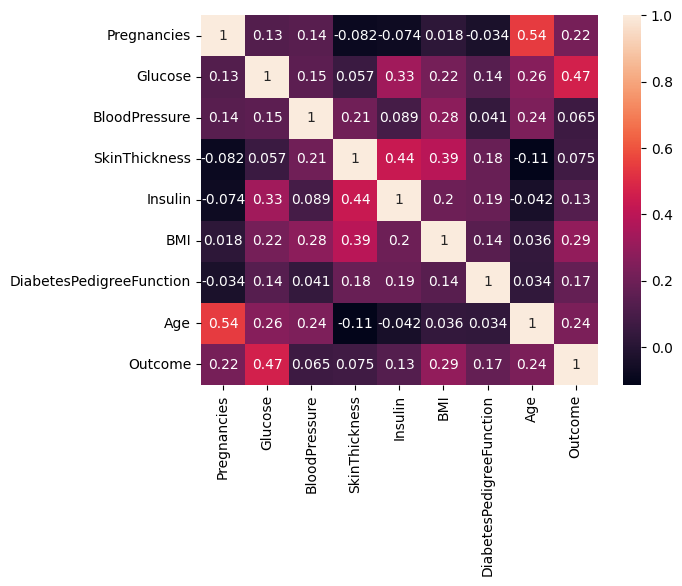

In [7]:
sns.heatmap(data=diabetes_dataset.corr(),annot=True)
plt.show()

In [8]:
for feature in diabetes_dataset.columns:
      Q1 = diabetes_dataset[feature].quantile(0.25)
      Q3 = diabetes_dataset[feature].quantile(0.75)
      IQR = Q3 - Q1
      lower = Q1 - 1.5 * IQR
      upper = Q3 + 1.5 * IQR

      if (diabetes_dataset[feature] >= upper).any():
          print(feature, "yes")  # Outlier exists
      else:
          print(feature, "no")   # No outlier


Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


<Axes: xlabel='Insulin'>

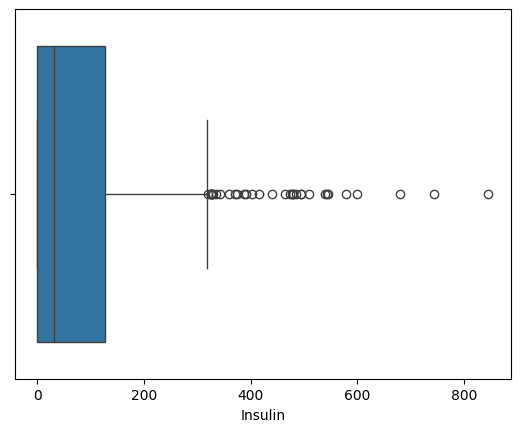

In [9]:
sns.boxplot(x='Insulin',data=diabetes_dataset)

In [10]:
diabetes_dataset.shape

(768, 9)

In [11]:
# Step 1: Calculate Q1, Q3, and IQR
Q1 = diabetes_dataset.quantile(0.25)
Q3 = diabetes_dataset.quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove rows with any outlier
diabetes_dataset = diabetes_dataset[~((diabetes_dataset < lower_bound) | (diabetes_dataset > upper_bound)).any(axis=1)]
diabetes_dataset.reset_index(drop=True, inplace=True)

# Optional: Check updated shape
print("Dataset shape after removing outliers:", diabetes_dataset.shape)


Dataset shape after removing outliers: (639, 9)


<Axes: xlabel='Insulin'>

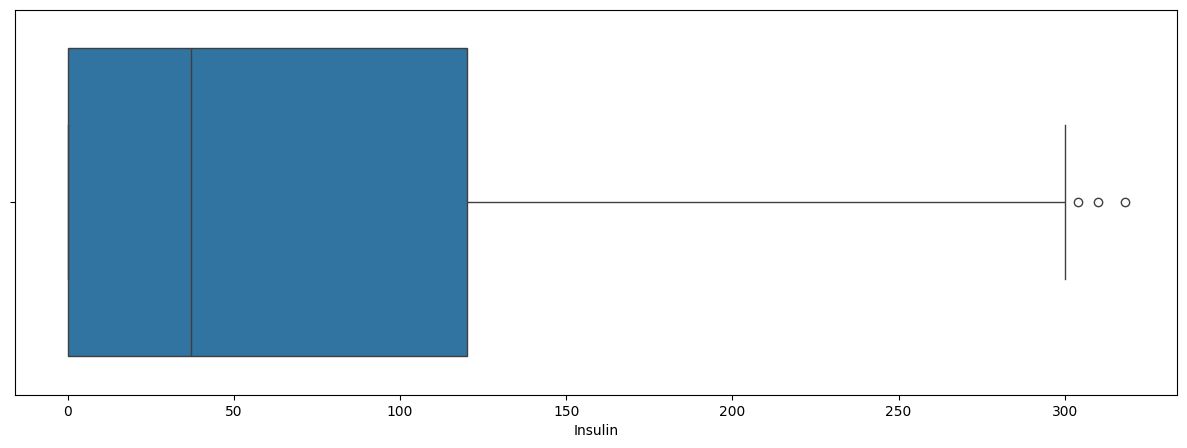

In [12]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Insulin',data=diabetes_dataset)

In [13]:
# Exploring Imbalance In Dataset

diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,439
1,200


In [14]:
# Extracting Features Into Features & Target
X = diabetes_dataset.drop(['Outcome'], axis=1)
Y = diabetes_dataset['Outcome']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (Y) Shape Before Balancing :', Y.shape)

Feature (X) Shape Before Balancing : (639, 8)
Target (Y) Shape Before Balancing : (639,)


In [15]:
from imblearn.over_sampling import SMOTE


# Intialising SMOTE Object
sm = SMOTE(random_state=300)
# Resampling Data
X, Y = sm.fit_resample(X, Y)


print('Feature (X) Shape After Balancing :', X.shape)
print('Target (Y) Shape After Balancing :', Y.shape)

Feature (X) Shape After Balancing : (878, 8)
Target (Y) Shape After Balancing : (878,)


In [16]:
X = diabetes_dataset.iloc[:,:-1]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
634,10,101,76,48,180,32.9,0.171,63
635,2,122,70,27,0,36.8,0.340,27
636,5,121,72,23,112,26.2,0.245,30
637,1,126,60,0,0,30.1,0.349,47


In [17]:
Y=diabetes_dataset["Outcome"]
Y

,Outcome
0,1
1,0
2,1
3,0
4,0
...,...
634,0
635,0
636,0
637,1


In [18]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.673824,0.991351,-0.010626,0.941847,-0.829247,0.247974,0.788892,1.561132
1,-0.860651,-1.170674,-0.539736,0.550406,-0.829247,-0.840853,-0.311759,-0.154912
2,1.287615,2.192476,-0.716106,-1.341558,-0.829247,-1.354158,0.968346,-0.064594
3,-0.860651,-1.033403,-0.539736,0.158965,0.353035,-0.607533,-1.045526,-1.058093
4,0.366929,-0.106820,0.165744,-1.341558,-0.829247,-0.996400,-0.909939,-0.245230
...,...,...,...,...,...,...,...,...
634,1.901405,-0.621588,0.342113,1.789969,1.434699,0.139091,-1.029575,2.735268
635,-0.553756,0.099087,-0.186996,0.419926,-0.829247,0.745724,-0.355625,-0.516184
636,0.366929,0.064769,-0.010626,0.158965,0.579430,-0.903072,-0.734473,-0.245230
637,-0.860651,0.236358,-1.068846,-1.341558,-0.829247,-0.296440,-0.319735,1.290178


In [19]:
Y=diabetes_dataset["Outcome"]
Y

,Outcome
0,1
1,0
2,1
3,0
4,0
...,...
634,0
635,0
636,0
637,1


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.3, random_state=900)

In [21]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
389,0.980720,0.579537,1.576703,-1.341558,-0.829247,-0.327549,-0.874048,1.561132
363,0.060034,-0.072503,-0.716106,0.419926,0.680050,0.185755,-0.794291,-0.787139
125,0.980720,1.128623,1.400333,1.529009,-0.829247,2.798942,-0.367589,0.296679
430,-0.246861,0.167722,0.694853,0.811367,0.805825,0.185755,-0.495201,-0.606502
105,1.594510,0.099087,-1.421586,-1.341558,-0.829247,0.201310,2.730984,0.025724
...,...,...,...,...,...,...,...,...
126,-0.553756,-0.690224,-1.774326,-0.362956,0.353035,-1.151947,0.828771,-1.058093
380,0.366929,-1.067720,0.518483,0.615647,-0.829247,-0.685307,-0.682630,0.386997
492,0.673824,0.133405,-0.010626,1.594249,2.063572,0.247974,1.211606,0.116043
184,-0.860651,-0.655906,-0.539736,-0.362956,-0.124909,-1.307494,0.944419,-0.606502


In [22]:
Y_train

,Outcome
389,0
363,0
125,1
430,0
105,1
...,...
126,0
380,0
492,0
184,0


In [23]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
lr.score(X_train,Y_train)*100,lr.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[269  37]
 [ 65  77]]
Accuracy by confusion matrix: 0.7723214285714286


                  precision    recall  f1-score   support

without diabetes       0.81      0.88      0.84       306
   with diabetes       0.68      0.54      0.60       142

        accuracy                           0.77       448
       macro avg       0.74      0.71      0.72       448
    weighted avg       0.76      0.77      0.76       448

----------------------------------------------------------------------


(79.58115183246073, 77.23214285714286)

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameter configuration space
logreg_params = {
      'penalty': ['l1','l2'],
      'C': [0.01, 0.1, 1, 10],
      'solver': ['liblinear'],
      'max_iter': [100, 200, 500],
                                     }
# Grid search with 3-fold cross-validation
lr_grid = GridSearchCV(lr, logreg_params, cv=3)
lr_grid.fit(X_train, Y_train)

# Best hyperparameters
print("Best Parameters:", lr_grid.best_params_)
print( lr_grid.best_estimator_)

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=0.1, solver='liblinear')


In [26]:
lr_grid.fit(X_train,Y_train)
Y_pred = lr_grid.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
lr_grid.score(X_train,Y_train)*100,lr_grid.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[265  41]
 [ 60  82]]
Accuracy by confusion matrix: 0.7745535714285714


                  precision    recall  f1-score   support

without diabetes       0.82      0.87      0.84       306
   with diabetes       0.67      0.58      0.62       142

        accuracy                           0.77       448
       macro avg       0.74      0.72      0.73       448
    weighted avg       0.77      0.77      0.77       448

----------------------------------------------------------------------


(79.58115183246073, 77.45535714285714)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
knn.score(X_train,Y_train)*100,knn.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[272  34]
 [ 77  65]]
Accuracy by confusion matrix: 0.7522321428571429


                  precision    recall  f1-score   support

without diabetes       0.78      0.89      0.83       306
   with diabetes       0.66      0.46      0.54       142

        accuracy                           0.75       448
       macro avg       0.72      0.67      0.68       448
    weighted avg       0.74      0.75      0.74       448

----------------------------------------------------------------------


(81.15183246073299, 75.22321428571429)

In [28]:
#KNN
from sklearn.model_selection import GridSearchCV
knn_params = {
    'n_neighbors': [2,5,7,12,15],
        }
# Grid search with 3-fold cross-validation
knn_grid = GridSearchCV(knn, knn_params, cv=3)

# Fit the model on training data
knn_grid.fit(X_train, Y_train)

# Best hyperparameters
print("Best Parameters:", knn_grid.best_params_)
print( knn_grid.best_estimator_)

Best Parameters: {'n_neighbors': 7}
KNeighborsClassifier(n_neighbors=7)


In [29]:
knn_grid.fit(X_train,Y_train)
Y_pred = knn_grid.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
knn_grid.score(X_train,Y_train)*100,knn_grid.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[276  30]
 [ 79  63]]
Accuracy by confusion matrix: 0.7566964285714286


                  precision    recall  f1-score   support

without diabetes       0.78      0.90      0.84       306
   with diabetes       0.68      0.44      0.54       142

        accuracy                           0.76       448
       macro avg       0.73      0.67      0.69       448
    weighted avg       0.75      0.76      0.74       448

----------------------------------------------------------------------


(78.01047120418848, 75.66964285714286)

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
dt.score(X_train,Y_train)*100,dt.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[229  77]
 [ 61  81]]
Accuracy by confusion matrix: 0.6919642857142857


                  precision    recall  f1-score   support

without diabetes       0.79      0.75      0.77       306
   with diabetes       0.51      0.57      0.54       142

        accuracy                           0.69       448
       macro avg       0.65      0.66      0.65       448
    weighted avg       0.70      0.69      0.70       448

----------------------------------------------------------------------


(100.0, 69.19642857142857)

[Text(0.6416666666666667, 0.95, 'x[1] <= 0.888\ngini = 0.423\nsamples = 191\nvalue = [133, 58]'),
 Text(0.39, 0.85, 'x[5] <= 0.194\ngini = 0.334\nsamples = 156\nvalue = [123, 33]'),
 Text(0.5158333333333334, 0.8999999999999999, 'True  '),
 Text(0.12666666666666668, 0.75, 'x[5] <= -0.888\ngini = 0.209\nsamples = 101\nvalue = [89, 12]'),
 Text(0.1, 0.65, 'gini = 0.0\nsamples = 39\nvalue = [39, 0]'),
 Text(0.15333333333333332, 0.65, 'x[7] <= -0.561\ngini = 0.312\nsamples = 62\nvalue = [50, 12]'),
 Text(0.08, 0.55, 'x[3] <= -1.015\ngini = 0.077\nsamples = 25\nvalue = [24, 1]'),
 Text(0.05333333333333334, 0.45, 'x[5] <= -0.39\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.02666666666666667, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08, 0.35, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.10666666666666667, 0.45, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.22666666666666666, 0.55, 'x[2] <= 0.871\ngini = 0.418\nsamples = 37\nvalue = [26, 11]'),
 Text(0.2,

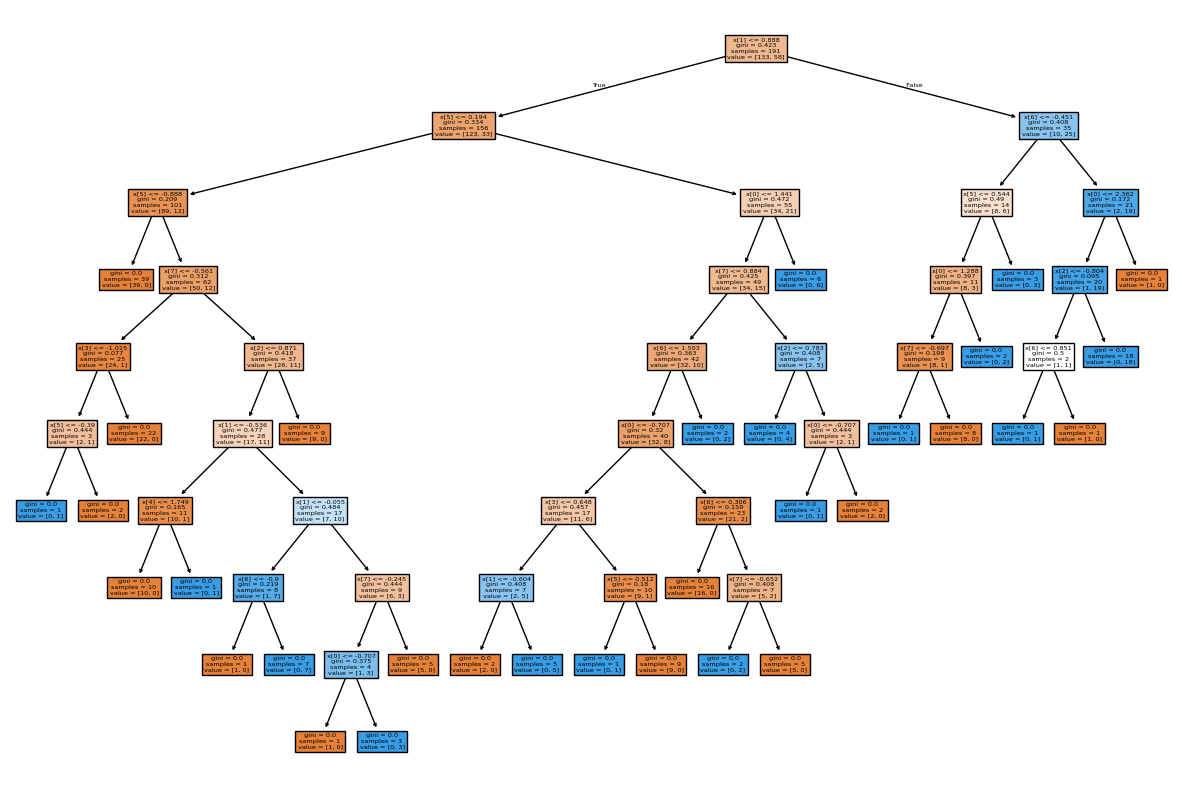

In [31]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)

In [32]:
dt_params = {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [3, 5, 10, 15],
        'max_features': ['sqrt', 'log2']
                                            }




dt_grid= GridSearchCV(dt,param_grid = dt_params,cv = 3)
dt_grid.fit(X_train,Y_train)
# Best hyperparameters
print("Best Parameters:", dt_grid.best_params_)
print( dt_grid.best_estimator_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'splitter': 'random'}
DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2',
                       splitter='random')


In [33]:
dt_grid.fit(X_train,Y_train)
Y_pred = dt_grid.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
dt_grid.score(X_train,Y_train)*100,dt_grid.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[264  42]
 [108  34]]
Accuracy by confusion matrix: 0.6651785714285714


                  precision    recall  f1-score   support

without diabetes       0.71      0.86      0.78       306
   with diabetes       0.45      0.24      0.31       142

        accuracy                           0.67       448
       macro avg       0.58      0.55      0.55       448
    weighted avg       0.63      0.67      0.63       448

----------------------------------------------------------------------


(78.53403141361257, 66.51785714285714)

In [34]:
from sklearn import svm
svm = svm.SVC(kernel='linear')
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
svm.score(X_train,Y_train)*100,svm.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[276  30]
 [ 62  80]]
Accuracy by confusion matrix: 0.7946428571428571


                  precision    recall  f1-score   support

without diabetes       0.82      0.90      0.86       306
   with diabetes       0.73      0.56      0.63       142

        accuracy                           0.79       448
       macro avg       0.77      0.73      0.75       448
    weighted avg       0.79      0.79      0.79       448

----------------------------------------------------------------------


(80.10471204188482, 79.46428571428571)

In [35]:
#SVM
from sklearn.model_selection import GridSearchCV
svm_params = {
    'C': [1,10, 100],
    "kernel":['linear','sigmoid'],

                 }
# Grid search with 3-fold cross-validation
svm_grid = GridSearchCV(svm, svm_params, cv=3)

# Fit the model on training data
svm_grid.fit(X_train, Y_train)

# Best hyperparameters
print("Best Parameters:", svm_grid.best_params_)
print( svm_grid.best_estimator_)

Best Parameters: {'C': 10, 'kernel': 'linear'}
SVC(C=10, kernel='linear')


In [36]:
svm_grid.fit(X_train,Y_train)
Y_pred = svm_grid.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
svm_grid.score(X_train,Y_train)*100,svm_grid.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[276  30]
 [ 62  80]]
Accuracy by confusion matrix: 0.7946428571428571


                  precision    recall  f1-score   support

without diabetes       0.82      0.90      0.86       306
   with diabetes       0.73      0.56      0.63       142

        accuracy                           0.79       448
       macro avg       0.77      0.73      0.75       448
    weighted avg       0.79      0.79      0.79       448

----------------------------------------------------------------------


(80.10471204188482, 79.46428571428571)

In [37]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
267,-0.860651,1.300212,-0.010626,0.028485,1.283769,-0.996400,-1.220992,-0.787139
94,0.366929,-1.410899,-2.127065,-1.341558,-0.829247,0.263529,0.896565,-0.696820
214,-0.246861,0.785444,0.694853,-0.362956,-0.829247,0.061318,-0.913927,2.735268
153,0.366929,0.682490,0.694853,0.941847,1.183149,-0.063119,-0.271880,-0.696820
427,0.980720,0.202040,1.223963,-1.341558,-0.829247,0.870161,-0.499189,1.651450
...,...,...,...,...,...,...,...,...
437,-1.167546,-0.278410,-0.627921,-1.341558,-0.829247,-1.151947,0.920492,-0.154912
28,2.208300,0.648173,0.342113,-1.341558,-0.829247,0.185755,-0.036596,0.206361
216,0.366929,-0.793178,0.165744,-0.167235,0.013444,0.247974,2.264403,0.928905
19,-0.860651,-0.758860,-0.539736,-0.362956,0.931599,-1.369712,0.230591,-0.967775


In [38]:
svm.predict([[0.366929,-1.410899,-2.127065,-1.341558,-0.829247,0.263529,0.896565,-0.696820]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [39]:
Y_test

,Outcome
267,0
94,0
214,0
153,1
427,0
...,...
437,0
28,0
216,0
19,0


In [40]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = svm_grid.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.36692937  1.60907257 -0.01062636 -0.10199517  1.37181113 -0.96529078
   0.62937773  1.65145033]]
[1]
The person is diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [41]:
import pickle
# Save the trained SVM model with pickle
pickle.dump(svm_grid, open('diabetes.pkl', 'wb'))
